In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split


In [ ]:
mnist = fetch_openml('mnist_784')

In [31]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)

# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


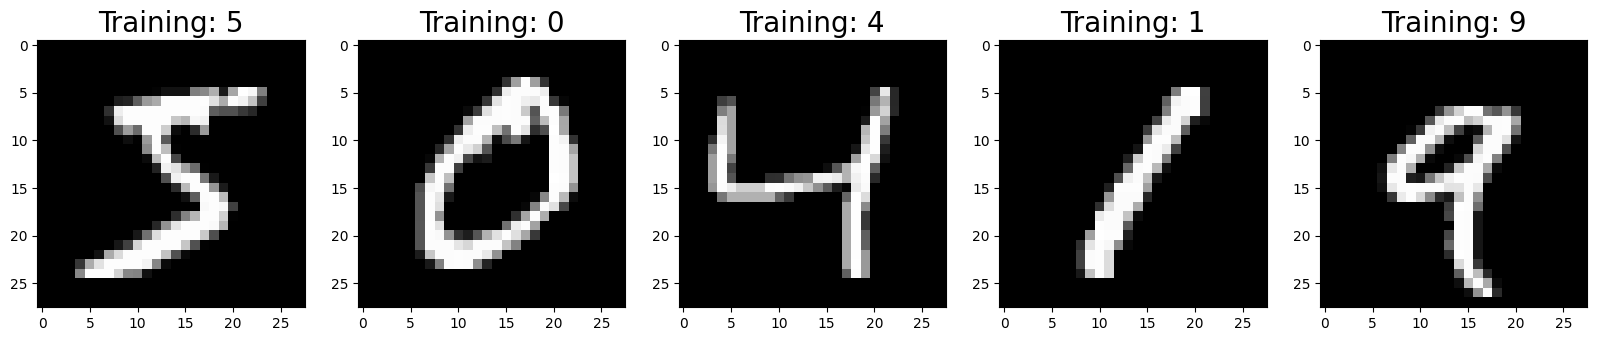

In [111]:
plt.figure(figsize=(20,4))

for index in range(5):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(mnist.data.iloc[index].values, (28,28)), cmap=plt.cm.gray)
    label = mnist.target.iloc[index]
    plt.title('Training: ' + str(label), fontsize = 20)
    

In [36]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [37]:
X2_train.shape, X2_test.shape

((60000, 784), (10000, 784))

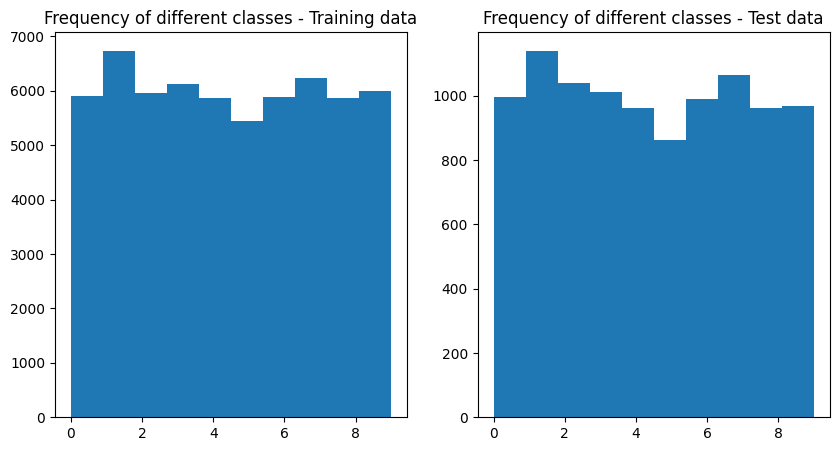

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y2_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y2_test);
plt.title('Frequency of different classes - Test data');

In [39]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )
clf2

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [40]:
%%time
clf2.fit(X2_train, y2_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 47 epochs took 255 seconds
CPU times: total: 4min 12s
Wall time: 4min 15s


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [41]:
clf2.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
clf2.coef_.shape

(10, 784)

In [43]:
clf2.coef_[1].round(3) # prints weights for 8x8 image for class 0

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,
       -0.001, -0.001, -0.001,  0.   ,  0.002,  0.004,  0.001,  0.002,
        0.002,  0.001, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.001, -0.001, -0.001, -0.002, -0.003,
        0.001,  0.002, -0.001,  0.001,  0.002,  0.   , -0.002,  0.   ,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.   , -0.   ,  0.   ,
      

In [44]:
clf2.intercept_ # for 10 classes - this is a One-vs-All classification

array([-1.13161614e-04,  1.40545887e-04,  1.15135402e-04, -2.35148539e-04,
        6.84427773e-05,  8.45146726e-04, -4.11838518e-05,  2.70210543e-04,
       -8.65070134e-04, -1.84917198e-04])

In [45]:
clf2.n_iter_[0] # num of iterations before tolerance was reached

47

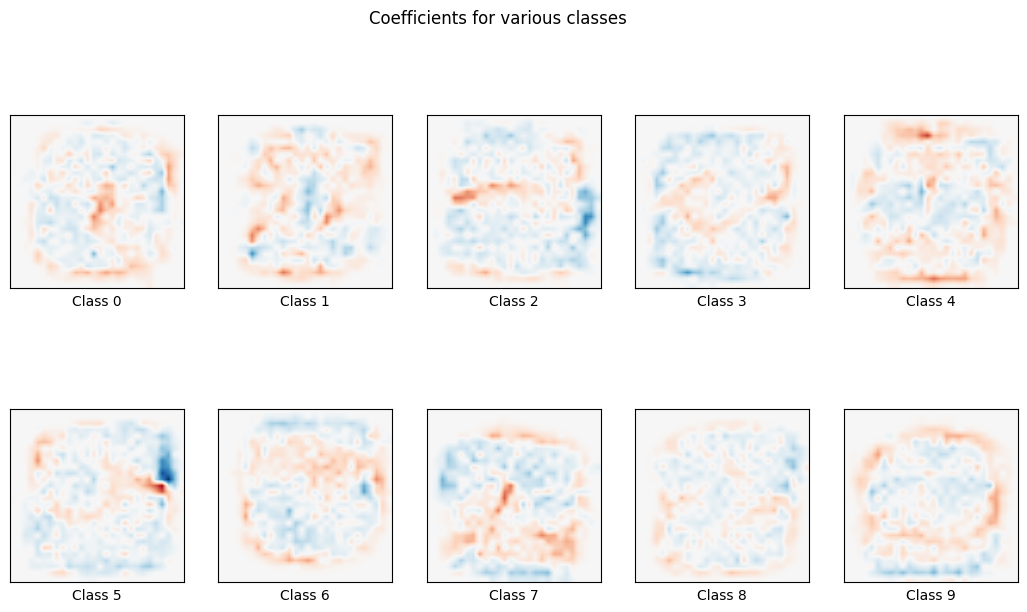

In [46]:
coef = clf2.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [47]:
print(clf2.predict(X2_test[0:9]))
print(y2_test[0:9])

[0 4 1 2 4 7 7 1 1]
10840    0
56267    4
14849    1
62726    2
47180    7
61640    9
52730    7
21847    1
20394    1
Name: class, dtype: int32


In [64]:
clf2.predict(X2_test[0:10])

array([0, 4, 1, 2, 4, 7, 7, 1, 1, 7])

In [53]:
score = clf2.score(X2_train, y2_train) # training score
score

0.9374833333333333

In [49]:
from sklearn import metrics

In [50]:
predictions2 = clf2.predict(X2_test)

cm = metrics.confusion_matrix(y_true=y2_test, 
                         y_pred = predictions2, 
                        labels = clf2.classes_)
cm

array([[ 966,    0,    1,    2,    1,   10,    9,    0,    7,    0],
       [   0, 1114,    5,    3,    1,    5,    0,    4,    7,    2],
       [   3,   14,  930,   18,   12,    1,   14,   10,   35,    3],
       [   1,    5,   33,  894,    0,   26,    2,   12,   27,   13],
       [   1,    2,    5,    1,  897,    1,   11,    9,    7,   28],
       [  10,    2,    6,   30,    9,  747,   16,    6,   30,    7],
       [   7,    3,    6,    0,   11,   18,  938,    1,    5,    0],
       [   2,    5,   14,    2,   12,    2,    1,  981,    4,   41],
       [   4,   18,    8,   18,    6,   25,    9,    2,  861,   12],
       [   4,    5,    6,   10,   35,    7,    2,   30,    8,  862]],
      dtype=int64)

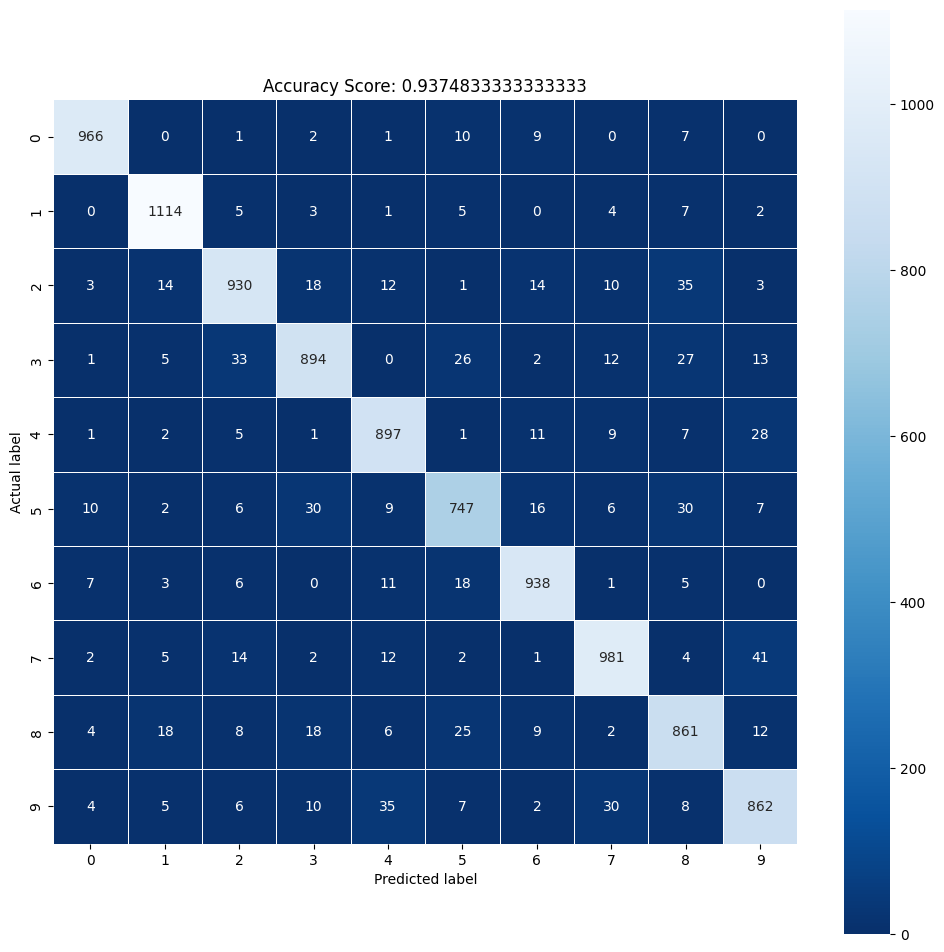

In [54]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);